In [1]:
# Make data model using loop

In [2]:
# Importing Packages
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [3]:
# import main_df
main_df=pd.read_csv('Database/main_allyears_df.csv').iloc[:,1:]

In [4]:
# Defining Model Columns

'''
These columns have stroke differnetial field average in them
model_columns=[['Scoring Average (Actual)','Birdie to Bogey Ratio','Greens in Regulation Percentage'],
 ['Scoring Average (Actual)','Bogey Avoidance', 'Greens in Regulation Percentage', 'Par Breakers'],
 ['Scoring Average (Actual)','Birdie or Better Percentage','Bogey Avoidance','Greens in Regulation Percentage'],
 ['Scoring Average (Actual)','Birdie Average','Bogey Avoidance','Greens in Regulation Percentage'],
 ['Scoring Average (Actual)','Bogey Average','Greens in Regulation Percentage','Par 4 Performance','Par Breakers','Stroke Differential Field Average'],
 ['Scoring Average (Actual)','Birdie or Better Percentage','Bogey Average','Greens in Regulation Percentage','Par 4 Performance','Stroke Differential Field Average'],
 ['Scoring Average (Actual)','Birdie Average','Bogey Avoidance','Greens in Regulation Percentage','Par 4 Performance','Stroke Differential Field Average']]
 
'''

#These columns do not have stroke differnetial field average in them
'''
model_columns=[['Scoring Average (Actual)','Birdie to Bogey Ratio','Greens in Regulation Percentage'],
 ['Scoring Average (Actual)','Bogey Avoidance', 'Greens in Regulation Percentage', 'Par Breakers'],
 ['Scoring Average (Actual)','Birdie or Better Percentage','Bogey Avoidance','Greens in Regulation Percentage'],
 ['Scoring Average (Actual)','Birdie Average','Bogey Avoidance','Greens in Regulation Percentage'],
 ['Scoring Average (Actual)','Bogey Average','Greens in Regulation Percentage','Par 4 Performance','Par Breakers'],
 ['Scoring Average (Actual)','Birdie or Better Percentage','Bogey Average','Greens in Regulation Percentage','Par 4 Performance'],
 ['Scoring Average (Actual)','Birdie Average','Bogey Avoidance','Greens in Regulation Percentage','Par 4 Performance']]
'''
# Intuitive Models that I think will be more interesting
model_columns=[['Scoring Average (Actual)','Par 3 Performance','Par 4 Performance','Par 5 Performance','Driving Distance','Greens in Regulation Percentage','Scrambling','Putting Average'],
              ['Scoring Average (Actual)','Driving Distance','Greens in Regulation Percentage','Scrambling','Putting Average'],
              ['Scoring Average (Actual)','Par 3 Birdie or Better Leaders','Par 4 Birdie or Better Leaders','Par 5 Birdie or Better Leaders','Birdie Average','Bogey Average','Good Drive Percentage','Scrambling','Putting Average'],
              ['Scoring Average (Actual)','Birdie Average','Bogey Average','Good Drive Percentage','Scrambling','Putting Average'],
              ['Scoring Average (Actual)','Driving Distance','Driving Accuracy Percentage','Good Drive Percentage','Greens in Regulation Percentage','Scrambling','Putting Average'],
              ['Scoring Average (Actual)','Putting Average','Scrambling','Greens in Regulation Percentage','Ball Striking','Driving Distance'],
              ['Scoring Average (Actual)','Putting Average','Overall Putting Average','Scrambling','Greens in Regulation Percentage','Ball Striking','Driving Distance'],
              ['Scoring Average (Actual)','Putting Average','Overall Putting Average','Scrambling','Greens in Regulation Percentage','Driving Distance']]

                               OLS Regression Results                               
Dep. Variable:     Scoring Average (Actual)   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                 5.138e+05
Date:                      Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                              16:16:23   Log-Likelihood:                 2433.6
No. Observations:                      1157   AIC:                            -4851.
Df Residuals:                          1149   BIC:                            -4811.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

AxesSubplot(0.125,0.125;0.775x0.755)
                               OLS Regression Results                               
Dep. Variable:     Scoring Average (Actual)   R-squared:                       0.880
Model:                                  OLS   Adj. R-squared:                  0.880
Method:                       Least Squares   F-statistic:                     1412.
Date:                      Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                              16:16:23   Log-Likelihood:                -993.93
No. Observations:                      1157   AIC:                             2002.
Df Residuals:                          1150   BIC:                             2037.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------

AxesSubplot(0.125,0.125;0.775x0.755)


/var/folders/tj/465rg90j3m59mm_rhyq5qcx40000gn/T/ipykernel_11831/1999109825.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


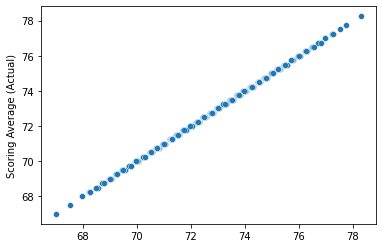

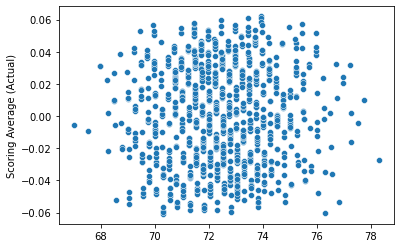

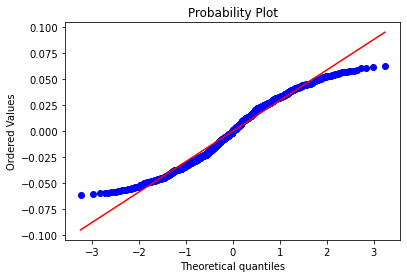

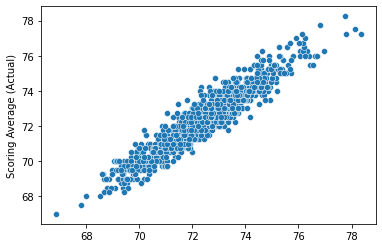

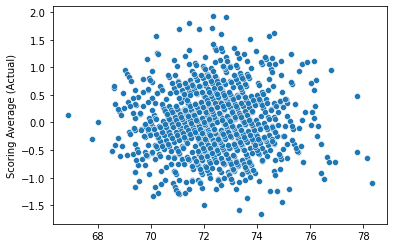

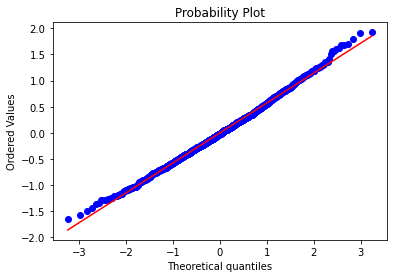

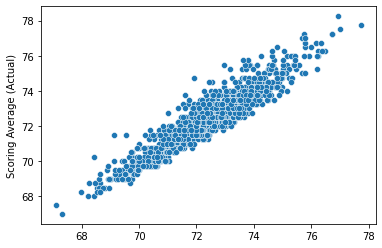

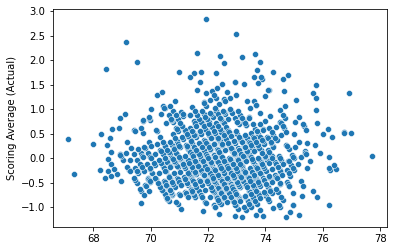

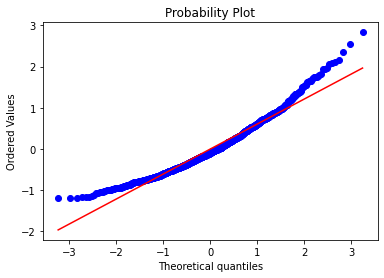

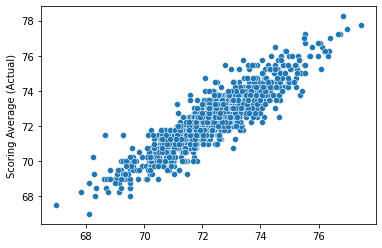

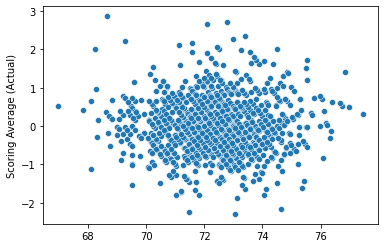

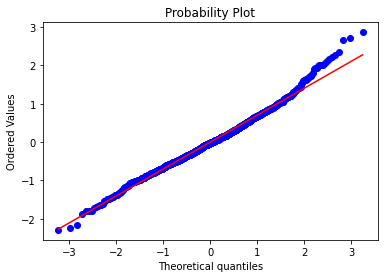

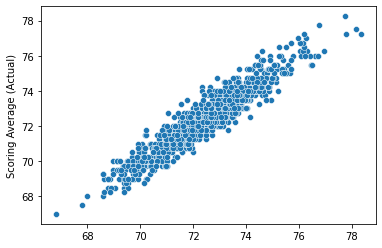

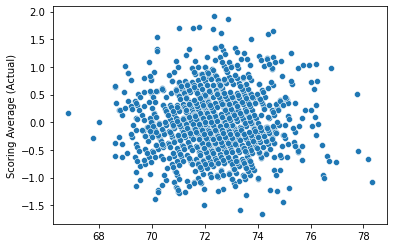

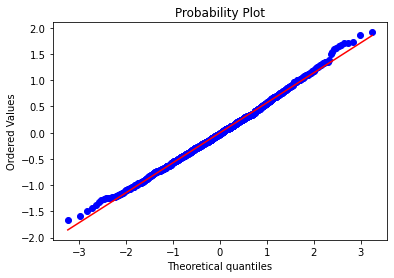

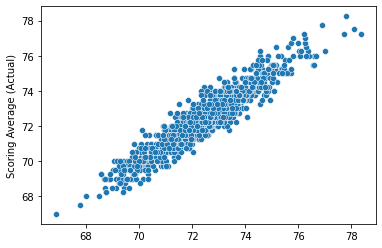

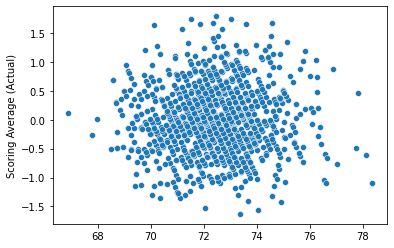

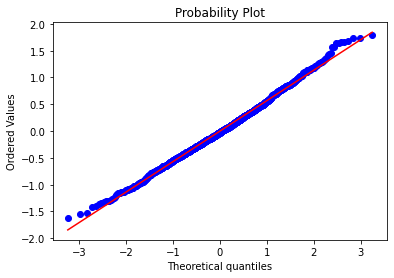

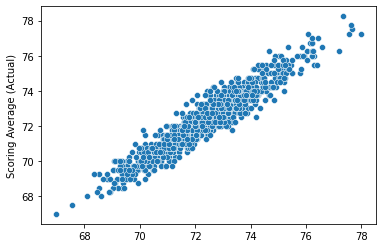

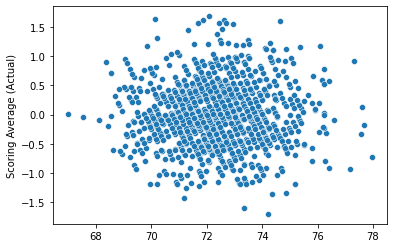

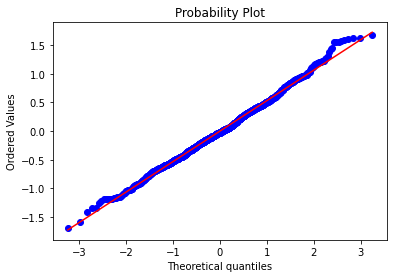

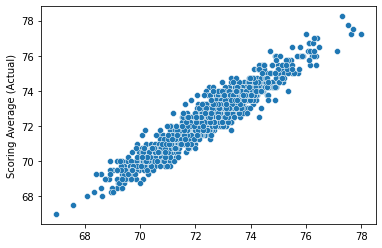

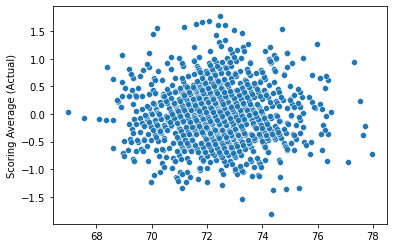

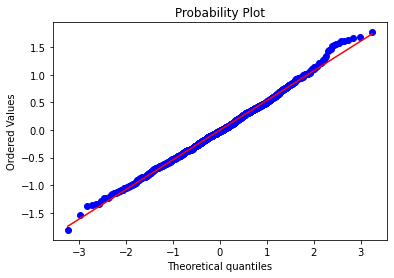

In [5]:
# Start looping

for i in list(range(len(model_columns))):
    model_df=main_df[model_columns[i]]
    y=model_df['Scoring Average (Actual)']
    x=sm.add_constant(model_df.drop(['Scoring Average (Actual)'],axis=1))
    model=sm.OLS(y,x)
    fit=model.fit()
    print(fit.summary())
    variables=fit.model.exog
    vif=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
    print(vif)
    model=LinearRegression()
    model.fit(x,y)
    print(model.score(x,y))
    predictions=model.predict(x)
    print(mean_squared_error(y,predictions))
    print(mean_absolute_error(y,predictions))
    print(list(model.coef_))
    print(model.intercept_)
    plt.figure()
    print(sns.scatterplot(y=y,x=predictions))
    resid=y-predictions
    plt.figure()
    print(sns.scatterplot(y=resid,x=predictions))
    plt.figure()
    stats.probplot(resid, dist="norm",plot=plt)
    

In [6]:
variables

array([[  1.   ,   1.75 ,   1.681,  66.67 ,  83.33 , 305.5  ],
       [  1.   ,   1.712,   1.583,  65.   ,  72.22 , 290.9  ],
       [  1.   ,   1.667,   1.556,  61.9  ,  70.83 , 277.6  ],
       ...,
       [  1.   ,   1.811,   1.639,  45.71 ,  51.39 , 282.   ],
       [  1.   ,   1.889,   1.708,  44.44 ,  50.   , 285.8  ],
       [  1.   ,   1.905,   1.722,  43.33 ,  58.33 , 301.9  ]])

In [7]:
fit